In [163]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=12)
plt.rc('axes', labelsize=12)

In [164]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
import gglngram as gn
import sqlite3 as sq

In [216]:
databasePath = 'database-f.sqlite'

In [217]:
dbconnection = sq.connect(databasePath)
cursor = dbconnection.cursor()

In [218]:
# Get sorted ngrams  by total counts
getTopNgram = """SELECT * from countngram
                 ORDER BY volumecount DESC"""

cursor.execute( getTopNgram )

rows = cursor.fetchall()
for row in rows[:10]:
    print(row)
    
print(len(rows))

('fait', 142220201, 767052)
('fait_VERB', 100080986, 765781)
('faire', 101013603, 763828)
('faire_VERB', 100345280, 763704)
('fois', 49508572, 759627)
('fois_NOUN', 49508572, 759627)
('faut', 50465591, 752061)
('faut_VERB', 50465591, 752061)
('fait_NOUN', 42139215, 749074)
('fin', 26790668, 747147)
303812


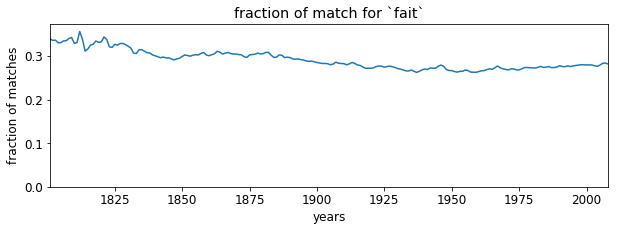

In [222]:
gn.plot( cursor, "fait", k=3, volume=False )

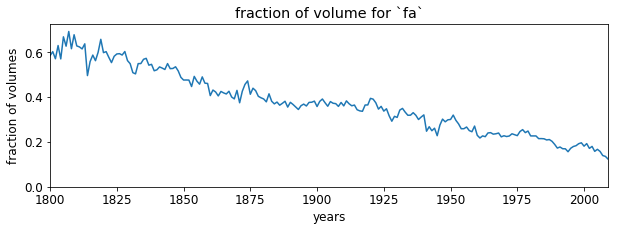

In [285]:
gn.plot( cursor, "fa", k=None, volume=True, normed=True )

In [248]:
import random

sample_rows = rows[:6000] # filter 
random.shuffle(sample_rows)

sample_rows = sample_rows[:1000]

In [280]:
stats = {}
for ng, c, ngs in sample_rows:
    stats[ng] = getMaxCumSum( *gn.getCountPerYear( cursor, ng, k=3, volume=True, normed=True ) )

In [281]:
print('\n'.join( ['%s  (%.2f)'%d for d in sorted( stats.items(), key=lambda x:x[1], reverse=True )[:20]] ))

FIN  (20.56)
funeste_ADJ  (19.49)
film  (16.19)
familiales  (15.81)
final_ADJ  (15.10)
financement  (14.67)
forcé_VERB  (14.61)
fonctionne_VERB  (14.50)
fortifier_VERB  (13.45)
Française_ADJ  (13.22)
façons  (12.85)
fonction  (11.56)
fa  (11.53)
ferai_VERB  (11.44)
frapper  (11.32)
fatalement  (11.13)
façon  (11.11)
fatalement_ADV  (11.09)
futur_NOUN  (10.96)
forcée_VERB  (10.72)


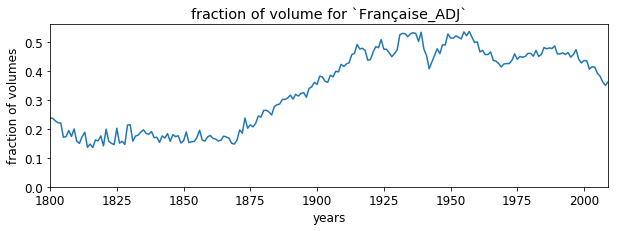

In [275]:
gn.plot( cursor, "Française_ADJ", k=None, volume=True, normed=True )

In [279]:
def getStats( years, counts ):
    yMean = np.sum( years*counts )/np.sum(counts)
    yMean = int( yMean )

    # Moment inertia
    yMoment = np.sum( counts*(years - yMean)**2 )/np.sum(counts)
    yMoment = yMoment / np.mean( (years - yMean)**2 )
    
    startend = (counts[-10:-1].mean() - counts[:10].mean())/np.mean(counts)
    
    return yMean, yMoment, startend


def getMoment( years, counts ):
    yMean = np.sum( years*counts )/np.sum(counts)
    yMean = int( yMean )

    # Moment inertia
    yMoment = np.sum( counts*(years - yMean)**2 )/np.sum(counts)

    return yMoment


def getTheMoment( years, counts ):
    m = np.mean( years*(counts - counts.mean()) )
    return m/counts.mean()


def getStartend( years, counts ):
    startend = (counts[-10:-1].mean() - counts[:10].mean())/counts.mean()
    
    return startend


def getMaxovermean( years, counts ):
    maxovermean = counts.max()/counts.mean()
    return maxovermean

def getMaxMinOverMean( years, counts ):
    maxminovermean = (counts.max()-counts.min())/counts.mean()
    return maxminovermean

def getZscore( years, counts ):
    z = (counts.max() - counts.mean())/counts.std()
    return z

def getMaxCumSum( years, counts ):
    #cn = (counts - counts.min())/(counts.max() - counts.min())
    cn = counts
    cm = cn - cn.mean()
    cs = np.max( np.abs(np.cumsum( cm )) )
    return cs

In [203]:
ngram = 'astronomes'
years, counts = gn.getCountPerYear( cursor, ngram )

In [201]:
# metrics

In [202]:
normedCounts = (counts - min(counts))/(max(counts)-min(counts))

# average year
yMeanNormed = np.sum( years*normedCounts )/np.sum(normedCounts)
yMeanNormed = int( yMeanNormed )
print( yMeanNormed )

# average year
yMean = np.sum( years*counts )/np.sum(counts)
yMean = int( yMean )
print( yMean )

std = np.std( counts )
print( std/np.mean(counts) )

1864
1876
0.785997368234


In [197]:
# Moment inertia
yMoment = np.sum( counts*(years - yMean)**2 )/np.sum(counts)
yMoment = yMoment / np.mean( (years - yMean)**2 )
yMoment

0.7345173924473869

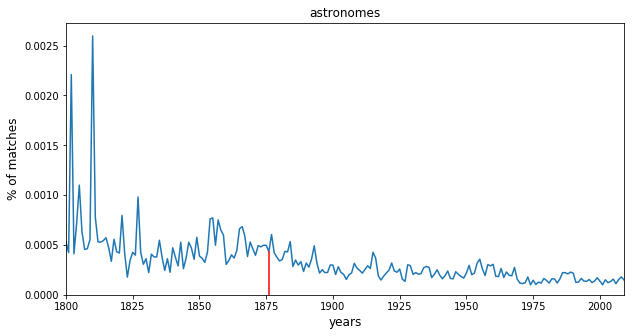

In [198]:
plt.figure( figsize=(10, 5) )
plt.plot( years, 100*counts )
plt.title( ngram )
plt.xlabel('years')
plt.ylabel('% of matches')
plt.ylim( 0,  1.05*max(100*counts) )
plt.xlim( min(years),  max(years) )

iMean = np.where( years==yMean )[0][0];
plt.plot( [yMean, yMean], [0, 100*counts[iMean] ], 'r' );

In [199]:
[0, 100*counts[iMean] ]

[0, 0.00043329697402797737]

In [187]:
counts = np.ones_like( years )
counts[ 50:150] = 1

In [131]:
200**2/12

3333.3333333333335

In [190]:
np.mean( (years - yMean)**2 )

3809.0

In [85]:
y, c = gn.getCountPerYear( cursor, 'bactéries', k=None )

In [86]:
ycs = sorted( zip(y, c), key=lambda x:x[1] )

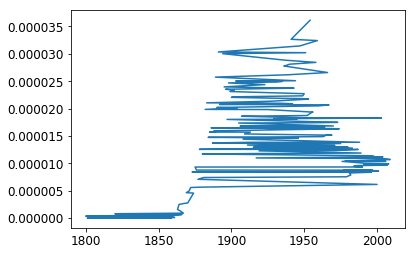

In [87]:
plt.plot( *list( zip( *ycs ) ) )

In [192]:
y, c = gn.getCountPerYear( cursor, 'bombe', k=20 )

In [193]:
cMax = [c[0]]
for v in c[1:]:
    if v>cMax[-1]:
        cMax.append( v )
    else:
        cMax.append( cMax[-1] )
        


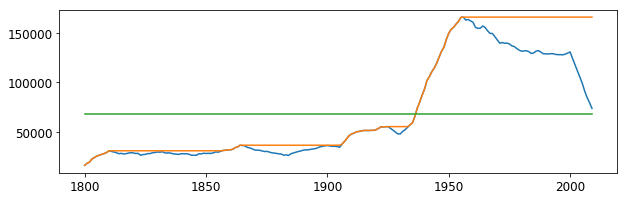

In [194]:
plt.figure( figsize=(10, 3) )
plt.plot( y, c )
plt.plot( y, cMax )
plt.plot( y, np.ones_like(y)*c.mean() )

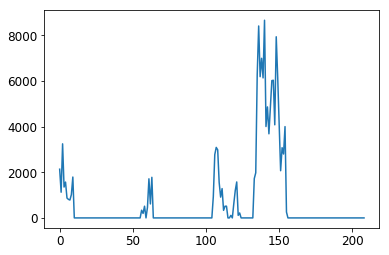

In [195]:
plt.plot( np.diff(cMax) )

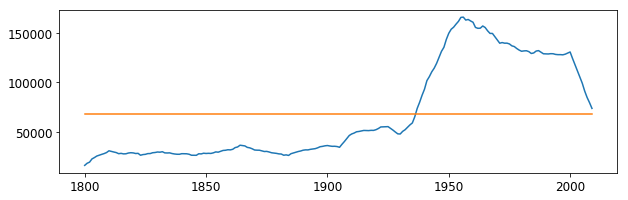

In [196]:
plt.figure( figsize=(10, 3) )
plt.plot( y, c )
plt.plot( y, np.ones_like(y)*c.mean() )

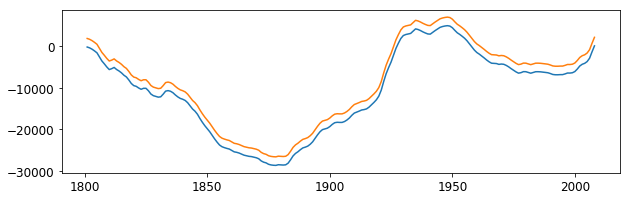

In [135]:
plt.figure( figsize=(10, 3) )
plt.plot( y, np.cumsum( c - c.mean()) )
plt.plot( y, np.cumsum( c  ) - range(len(y))*c.mean() )

In [144]:
y, c = gn.getCountPerYear( cursor, 'baisers', k=3 )
moment = np.sum( (y-1900)*(c - c.mean()) )
moment

2256515.0469731851

In [145]:
y, c = gn.getCountPerYear( cursor, 'bactéries', k=3 )
moment = np.sum( (y-1900)*(c - c.mean()) )
moment

34308245.632656634

In [1]:
## hysteresis filter

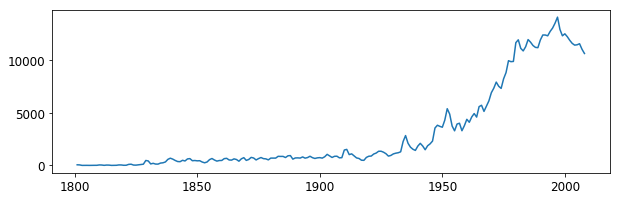

In [91]:
y, c = gn.getCountPerYear( cursor, 'mythique', k=3 )
#y, c = gn.getCountPerYear( cursor, 'maturation', k=3 )

plt.figure( figsize=(10, 3) )
plt.plot( y, c );

In [92]:
flag = [0, ]
tot_increase = 0
tot_decrease = 0

state = None
c_before = c[0]
for c_now in c[1:]:
    variation = (c_now - c_before)/c_before
    if variation > 0:
        tot_increase = tot_increase + variation
        state = 'increase'
        flag.append( 1 )
        tot_decrease = 0
    else:
        tot_decrease = tot_decrease - variation
        
        if tot_decrease > 0.6*tot_increase:
            state = 'decrease'
            flag.append( -1 )
            
        else:
             flag.append( 1 )
        tot_increase = 0
    c_before = c_now
    
flag = np.array( flag )

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


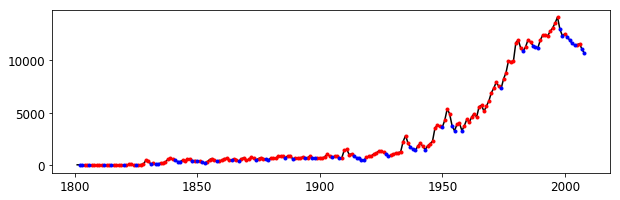

In [93]:
plt.figure( figsize=(10, 3) )
plt.plot( y, c, '-k' );
plt.plot( y[flag==1], c[flag==1], 'r.' );
plt.plot( y[flag==-1], c[flag==-1], 'b.' );